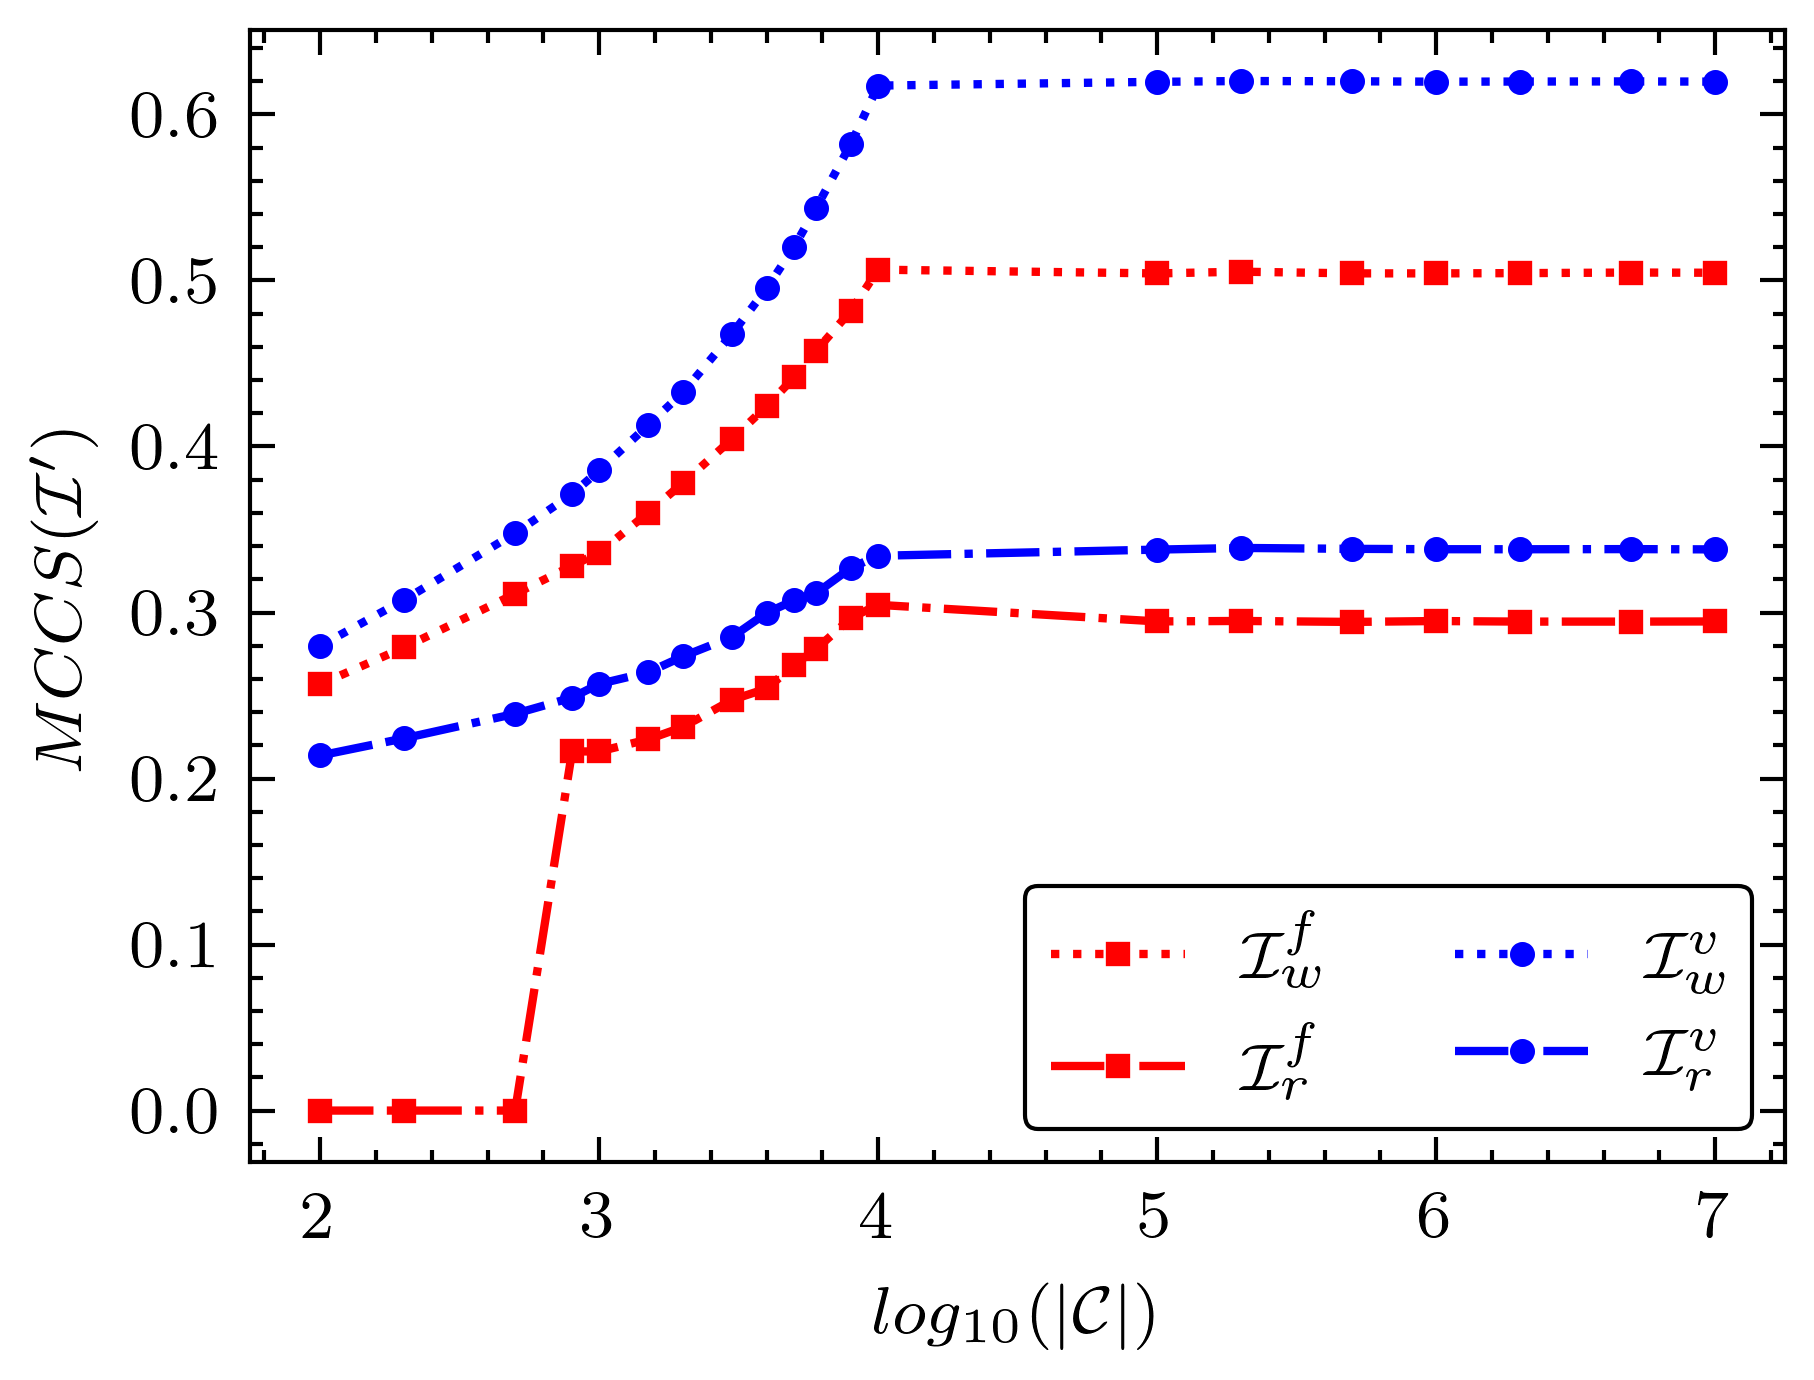

In [3]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import re
import matplotlib.pyplot as plt
from math import log10
import matplotlib.pyplot as plt
plt.style.use([ '/Users/wuzhenyu/.matplotlib/stylelib/science.mplstyle' , '/Users/wuzhenyu/.matplotlib/stylelib/ieee.mplstyle' ])
regex = re.compile(r"(\d+):\d+:\s+\d+\.\d+:(\d+\.?(\d+)?)")


# In[2]:


def read_from_txt(txt):
    x_lst = []
    y_lst = []
    budget_acc_lst = []
    step = 0
    with open(txt) as fp:
        for line in fp:
            line = line.rstrip('\n')
            r = re.search(regex, line)
            if r is not None:
                x_lst.append(log10(float(r.group(1))))
                y_lst.append(float(r.group(2)))
    return x_lst, y_lst
#theta_lst = [0.2,0.25,0.3,0.35,0.4,0.45,0.5]
theta_lst = [0.35, 0.4]
x_obs_lst, x_ref_lst, y_obs_lst, y_ref_lst = [], [], [], []
for theta in theta_lst:
    x_obs, y_obs = read_from_txt('../monte_carlo_sampling/MCCS_{}_obs.txt'.format(theta))
    x_ref, y_ref = read_from_txt('../monte_carlo_sampling/MCCS_{}_ref.txt'.format(theta))
    
    x_obs_lst.append(x_obs)
    x_ref_lst.append(x_ref)
    y_obs_lst.append(y_obs)
    y_ref_lst.append(y_ref)


# In[6]:


# for i in range(len(theta_lst)):
#     x_obs, x_ref, y_obs, y_ref = x_obs_lst[i], x_ref_lst[i], y_obs_lst[i], y_ref_lst[i]
#     theta = theta_lst[i]
#     plt.plot(x_obs, y_obs, color='r', marker='.', markersize=4, label=r'${{\mathcal{{I}}}}_w$'.format(theta))
#     plt.plot(x_ref[:20], y_ref[:20], color='b', marker='.', markersize=4, label=r'${{\mathcal{{I}}}}_r$'.format(theta))

x_obs, x_ref, y_obs, y_ref = x_obs_lst[0], x_ref_lst[0], y_obs_lst[0], y_ref_lst[0]
theta = theta_lst[0]
plt.plot(x_obs, y_obs, color='r', marker='s', markersize=2, linestyle=':', label=r'${{\mathcal{{I}}}}_w^f$'.format(theta))
plt.plot(x_ref[:20], y_ref[:20], color='r', marker='s', markersize=2, linestyle='-.', label=r'${{\mathcal{{I}}}}_r^f$'.format(theta))

x_obs, x_ref, y_obs, y_ref = x_obs_lst[1], x_ref_lst[1], y_obs_lst[1], y_ref_lst[1]
theta = theta_lst[1]
plt.plot(x_obs, y_obs, color='b', marker='.', markersize=4, linestyle=':', label=r'${{\mathcal{{I}}}}_w^v$'.format(theta))
plt.plot(x_ref[:20], y_ref[:20], color='b', marker='.', markersize=4, linestyle='-.', label=r'${{\mathcal{{I}}}}_r^v$'.format(theta))

leg=plt.legend(loc='lower right', ncol=len(theta_lst), shadow=False, framealpha=1, frameon=True, prop={'size': 8})
leg.get_frame().set_edgecolor('k')
leg.get_frame().set_linewidth(0.5)
plt.xlabel(r'$log_{10}(|\mathcal{C}|)$',fontsize=8)
plt.ylabel(r'$MCCS(\mathcal{I}^\prime)$', fontsize=8)
plt.savefig('MCCS_sample.pdf', bbox_inches='tight', dpi=800, pad_inches=0)
plt.show()
plt.close()